In [23]:
from google.colab import drive
drive.mount("/content/gdrive/")

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray
import cv2

total_pixels = []
changed_pixels = []
a = 0

for i in range(16):
  for j in range(16):
    print(i,j)
    im = Image.open('gdrive/MyDrive/GEE_DWL_2016/'+str(i)+'_'+str(j)+'.tif')
    data = np.array(im)

    r1, g1, b1 = 228, 150, 53 # Crops
    r2, g2, b2 = 223, 195, 90 # Shrub and scrub

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 179, 159, 225 # snow and ice
    r2, g2, b2 = 65, 155, 223 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 165, 155, 143 # bare
    r2, g2, b2 = 196, 40, 27 # built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 136, 176, 83 # grass
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 122, 135, 198 # flooded vegetation
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]
    new_data_2016 = data.copy()


    im = Image.open('gdrive/MyDrive/GEE_DWL_2019/'+str(i)+'_'+str(j)+'.tif')
    data = np.array(im)

    r1, g1, b1 = 228, 150, 53 # Crops
    r2, g2, b2 = 223, 195, 90 # Shrub and scrub

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 179, 159, 225 # snow and ice
    r2, g2, b2 = 65, 155, 223 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 165, 155, 143 # bare
    r2, g2, b2 = 196, 40, 27 # built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 136, 176, 83 # grass
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 122, 135, 198 # flooded vegetation
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]
    new_data_2019 = data.copy()

    if new_data_2016.shape == new_data_2019.shape:
      total_pixels.append(new_data_2016.shape[0]*new_data_2016.shape[1]*new_data_2016.shape[2])
    else:
      print("Pixel mismatch")
    
    sub = new_data_2016 + (-1)*new_data_2019
    coords = np.argwhere(np.abs(sub) > 0)
    changed_pixels.append(len(coords))

    sub[np.where(np.abs(sub)>0)] = new_data_2016.astype('int16')[np.where(np.abs(sub)>0)]
    modified_image_2016 = sub.copy()
    sub[np.where(np.abs(sub)>0)] = new_data_2019.astype('int16')[np.where(np.abs(sub)>0)]
    modified_image_2019 = sub.copy()

    '''im = Image.fromarray(modified_image_2016.astype('uint8'))
    im.save("gdrive/MyDrive/GEE_Dynamic_2016_lc_loss_np/"+str(i)+'_'+str(j)+'.jpeg')

    im = Image.fromarray(modified_image_2019.astype('uint8'))
    im.save("gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_np/"+str(i)+'_'+str(j)+'.jpeg')'''
    
    np.save("gdrive/MyDrive/GEE_Dynamic_2016_four_class_np/"+str(i)+'_'+str(j)+".npy", new_data_2016.astype('int16'))
    np.save("gdrive/MyDrive/GEE_Dynamic_2019_four_class_np/"+str(i)+'_'+str(j)+".npy", new_data_2019.astype('int16'))

    np.save("gdrive/MyDrive/GEE_Dynamic_2016_lc_loss_np/"+str(i)+'_'+str(j)+".npy", modified_image_2016)
    np.save("gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_np/"+str(i)+'_'+str(j)+".npy", modified_image_2019)
    a = a+1

In [ ]:
ratio_pixel_change = []

for i in range(256):
  ratio_pixel_change.append(changed_pixels[i]/total_pixels[i])

In [ ]:
import statistics
print("Average of pixel change ratio:", statistics.mean(ratio_pixel_change))

Average of pixel change ratio: 0.2833805497194366


In [ ]:
print("Average land cover area change:", statistics.mean(changed_pixels)/3000000)

Average land cover area change: 4.3063641953125


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray
import cv2

total_pixels = []
changed_pixels = []
a = 0

for i in range(16):
  for j in range(16):
    print(i,j)
    im = Image.open('gdrive/MyDrive/GEE_DWL_2016/'+str(i)+'_'+str(j)+'.tif')
    data = np.array(im)

    r1, g1, b1 = 228, 150, 53 # Crops
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 223, 195, 90 # Shrub and scrub
    r2, g2, b2 =  57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 179, 159, 225 # snow and ice
    r2, g2, b2 = 65, 155, 223 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 165, 155, 143 # bare
    r2, g2, b2 = 196, 40, 27 # built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 136, 176, 83 # grass
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 122, 135, 198 # flooded vegetation
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]
    new_data_2016 = data.copy()


    im = Image.open('gdrive/MyDrive/GEE_DWL_2019/'+str(i)+'_'+str(j)+'.tif')
    data = np.array(im)

    r1, g1, b1 = 228, 150, 53 # Crops
    r2, g2, b2 = 57, 125, 73 # trees
    
    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 223, 195, 90 # Shrub and scrub
    r2, g2, b2 =  57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 179, 159, 225 # snow and ice
    r2, g2, b2 = 65, 155, 223 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 165, 155, 143 # bare
    r2, g2, b2 = 196, 40, 27 # built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 136, 176, 83 # grass
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 122, 135, 198 # flooded vegetation
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]
    new_data_2019 = data.copy()

    if new_data_2016.shape == new_data_2019.shape:
      total_pixels.append(new_data_2016.shape[0]*new_data_2016.shape[1]*new_data_2016.shape[2])
    else:
      print("Pixel mismatch")
    
    sub = new_data_2016 + (-1)*new_data_2019
    coords = np.argwhere(np.abs(sub) > 0)
    changed_pixels.append(len(coords))

    sub[np.where(np.abs(sub)>0)] = new_data_2016.astype('int16')[np.where(np.abs(sub)>0)]
    modified_image_2016 = sub.copy()
    sub[np.where(np.abs(sub)>0)] = new_data_2019.astype('int16')[np.where(np.abs(sub)>0)]
    modified_image_2019 = sub.copy()

    '''im = Image.fromarray(modified_image_2016.astype('uint8'))
    im.save("gdrive/MyDrive/GEE_Dynamic_2016_lc_loss_np/"+str(i)+'_'+str(j)+'.jpeg')

    im = Image.fromarray(modified_image_2019.astype('uint8'))
    im.save("gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_np/"+str(i)+'_'+str(j)+'.jpeg')'''
    
    np.save("gdrive/MyDrive/GEE_Dynamic_2016_three_class_np/"+str(i)+'_'+str(j)+".npy", new_data_2016.astype('int16'))
    np.save("gdrive/MyDrive/GEE_Dynamic_2019_three_class_np/"+str(i)+'_'+str(j)+".npy", new_data_2019.astype('int16'))

    np.save("gdrive/MyDrive/GEE_Dynamic_2016_lc_loss_three_np/"+str(i)+'_'+str(j)+".npy", modified_image_2016)
    np.save("gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_three_np/"+str(i)+'_'+str(j)+".npy", modified_image_2019)
    a = a+1

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray
import cv2

total_pixels = []
changed_pixels = []
a = 0

for i in range(16):
  for j in range(16):
    print(i,j)
    im = Image.open('gdrive/MyDrive/GEE_2016_final/'+str(i)+str(j)+'.tif')
    data = np.array(im)

    r1, g1, b1 = 228, 150, 53 # Crops
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 223, 195, 90 # Shrub and scrub
    r2, g2, b2 =  57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 179, 159, 225 # snow and ice
    r2, g2, b2 = 65, 155, 223 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 165, 155, 143 # bare
    r2, g2, b2 = 196, 40, 27 # built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 136, 176, 83 # grass
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 122, 135, 198 # flooded vegetation
    r2, g2, b2 = 57, 125, 73 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]
    new_data_2016 = data.copy()


    im = Image.open('gdrive/MyDrive/GEE_2019_final/'+str(i)+str(j)+'.tif')
    data = np.array(im)

    new_data_2019 = data.copy()

    if new_data_2016.shape == new_data_2019.shape:
      total_pixels.append(new_data_2016.shape[0]*new_data_2016.shape[1]*new_data_2016.shape[2])
    else:
      print("Pixel mismatch")
    
    np.save("gdrive/MyDrive/GEE_2016_np/"+str(i)+'_'+str(j)+".npy", new_data_2016.astype('int16'))
    np.save("gdrive/MyDrive/GEE_2019_np/"+str(i)+'_'+str(j)+".npy", new_data_2019.astype('int16'))

    '''np.save("gdrive/MyDrive/GEE_Dynamic_2016_lc_loss_three_np/"+str(i)+'_'+str(j)+".npy", modified_image_2016)
    np.save("gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_three_np/"+str(i)+'_'+str(j)+".npy", modified_image_2019)'''
    a = a+1

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray
import cv2

total_pixels = []
changed_pixels = []
a = 0

for i in range(16):
  for j in range(16):
    print(i,j)
    im = Image.open('gdrive/MyDrive/GEE_DWL_2016/'+str(i)+'_'+str(j)+'.tif')
    data = np.array(im)

    r1, g1, b1 = 228, 150, 53 # Crops
    r2, g2, b2 = 1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 223, 195, 90 # Shrub and scrub
    r2, g2, b2 =  1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 179, 159, 225 # snow and ice
    r2, g2, b2 = 0,0,0 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 165, 155, 143 # bare
    r2, g2, b2 = 2,2,2 # built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 136, 176, 83 # grass
    r2, g2, b2 = 1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 122, 135, 198 # flooded vegetation
    r2, g2, b2 = 1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 57, 125, 73 # trees
    r2, g2, b2 =  1,1,1# trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 196, 40, 27 # built
    r2, g2, b2 =  2,2,2# built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 65, 155, 223 # water
    r2, g2, b2 =  0,0,0 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    new_data_2016 = data.copy()


    im = Image.open('gdrive/MyDrive/GEE_DWL_2019/'+str(i)+'_'+str(j)+'.tif')
    data = np.array(im)

    r1, g1, b1 = 228, 150, 53 # Crops
    r2, g2, b2 = 1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 223, 195, 90 # Shrub and scrub
    r2, g2, b2 =  1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 179, 159, 225 # snow and ice
    r2, g2, b2 = 0,0,0 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 165, 155, 143 # bare
    r2, g2, b2 = 2,2,2 # built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 136, 176, 83 # grass
    r2, g2, b2 = 1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 122, 135, 198 # flooded vegetation
    r2, g2, b2 = 1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 57, 125, 73 # trees
    r2, g2, b2 =  1,1,1# trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 196, 40, 27 # built
    r2, g2, b2 =  2,2,2# built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 65, 155, 223 # water
    r2, g2, b2 =  0,0,0 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    new_data_2019 = data.copy()

    if new_data_2016.shape == new_data_2019.shape:
      total_pixels.append(new_data_2016.shape[0]*new_data_2016.shape[1]*new_data_2016.shape[2])
    else:
      print("Pixel mismatch")
    '''
    sub = new_data_2016 + (-1)*new_data_2019
    coords = np.argwhere(np.abs(sub) > 0)
    changed_pixels.append(len(coords))

    sub[np.where(np.abs(sub)>0)] = new_data_2016.astype('int16')[np.where(np.abs(sub)>0)]
    modified_image_2016 = sub.copy()
    sub[np.where(np.abs(sub)>0)] = new_data_2019.astype('int16')[np.where(np.abs(sub)>0)]
    modified_image_2019 = sub.copy()'''

    '''im = Image.fromarray(modified_image_2016.astype('uint8'))
    im.save("gdrive/MyDrive/GEE_Dynamic_2016_lc_loss_np/"+str(i)+'_'+str(j)+'.jpeg')

    im = Image.fromarray(modified_image_2019.astype('uint8'))
    im.save("gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_np/"+str(i)+'_'+str(j)+'.jpeg')'''
    
    np.save("gdrive/MyDrive/GEE_Dynamic_2016_three_class_np_label/"+str(i)+'_'+str(j)+".npy", new_data_2016.astype('int16'))
    np.save("gdrive/MyDrive/GEE_Dynamic_2019_three_class_np_label/"+str(i)+'_'+str(j)+".npy", new_data_2019.astype('int16'))
    '''
    np.save("gdrive/MyDrive/GEE_Dynamic_2016_lc_loss_three_np/"+str(i)+'_'+str(j)+".npy", modified_image_2016)
    np.save("gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_three_np/"+str(i)+'_'+str(j)+".npy", modified_image_2019)'''
    a = a+1

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray
import cv2

total_pixels = []
changed_pixels = []
a = 0

for i in range(1):
  for j in range(4):
    print(i,j)
    im = Image.open('gdrive/MyDrive/UNET/Ground_work_images/Image_'+str(i)+str(j)+'.png')
    data = np.array(im)

    r1, g1, b1 = 228, 150, 53 # Crops
    r2, g2, b2 = 1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 223, 195, 90 # Shrub and scrub
    r2, g2, b2 =  1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 179, 159, 225 # snow and ice
    r2, g2, b2 = 0,0,0 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 165, 155, 143 # bare
    r2, g2, b2 = 2,2,2 # built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 136, 176, 83 # grass
    r2, g2, b2 = 1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 122, 135, 198 # flooded vegetation
    r2, g2, b2 = 1,1,1 # trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 57, 125, 73 # trees
    r2, g2, b2 =  1,1,1# trees

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 196, 40, 27 # built
    r2, g2, b2 =  2,2,2# built

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    r1, g1, b1 = 65, 155, 223 # water
    r2, g2, b2 =  0,0,0 # water

    red, green, blue = data[:,:,0], data[:,:,1], data[:,:,2]
    mask = (red == r1) & (green == g1) & (blue == b1)
    data[:,:,:3][mask] = [r2, g2, b2]

    new_data_2016 = data.copy()

    '''sub = new_data_2016 + (-1)*new_data_2019
    coords = np.argwhere(np.abs(sub) > 0)
    changed_pixels.append(len(coords))

    sub[np.where(np.abs(sub)>0)] = new_data_2016.astype('int16')[np.where(np.abs(sub)>0)]
    modified_image_2016 = sub.copy()
    sub[np.where(np.abs(sub)>0)] = new_data_2019.astype('int16')[np.where(np.abs(sub)>0)]
    modified_image_2019 = sub.copy()'''

    '''im = Image.fromarray(modified_image_2016.astype('uint8'))
    im.save("gdrive/MyDrive/GEE_Dynamic_2016_lc_loss_np/"+str(i)+'_'+str(j)+'.jpeg')

    im = Image.fromarray(modified_image_2019.astype('uint8'))
    im.save("gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_np/"+str(i)+'_'+str(j)+'.jpeg')'''
    
    np.save("gdrive/MyDrive/GEE_Dynamic_2016_three_class_np_label/"+str(i)+'_'+str(j)+".npy", new_data_2016.astype('int16'))
    np.save("gdrive/MyDrive/GEE_Dynamic_2019_three_class_np_label/"+str(i)+'_'+str(j)+".npy", new_data_2019.astype('int16'))
    '''
    np.save("gdrive/MyDrive/GEE_Dynamic_2016_lc_loss_three_np/"+str(i)+'_'+str(j)+".npy", modified_image_2016)
    np.save("gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_three_np/"+str(i)+'_'+str(j)+".npy", modified_image_2019)'''
    a = a+1

In [62]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from numpy import asarray
import cv2

im = np.load('gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_three_np/'+str(3)+'_'+str(7)+'.npy')


In [63]:
img = Image.fromarray(im.astype('uint8'))

In [64]:
img.save("gdrive/MyDrive/GEE_Dynamic_2019_lc_loss_three_np/37.jpeg")

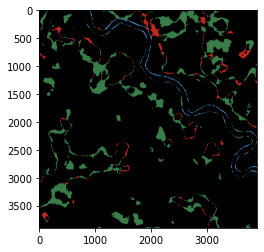

In [60]:
plt.imshow(img)